In [23]:
import pandas as pd
import numpy as np
from lstm_attention.src import utils
import matplotlib.pyplot as plt

# What is in the dataset?

In [47]:
mp_dataframe = pd.read_csv("D:\OtherPeptideResultsForTraining\JurkatMultiProtease_AllPeptides.psmtsv", sep='\t')
#only ambiguity == 1
mp_dataframe = mp_dataframe[mp_dataframe['Ambiguity Level'] == "1"]
mp_dataframe

C:\Users\elabo\AppData\Local\Temp\ipykernel_46748\3963291735.py:1: DtypeWarning: Columns (11,20,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  mp_dataframe = pd.read_csv("D:\OtherPeptideResultsForTraining\JurkatMultiProtease_AllPeptides.psmtsv", sep='\t')


,File Name,Scan Number,Scan Retention Time,Num Experimental Peaks,Total Ion Current,Precursor Scan Number,Precursor Charge,Precursor MZ,Precursor Mass,Score,...,Localized Scores,Improvement Possible,Cumulative Target,Cumulative Decoy,QValue,Cumulative Target Notch,Cumulative Decoy Notch,QValue Notch,PEP,PEP_QValue
0,130328_AspN_Frac4-calib-averaged,20417,164.69553,200.0,106039.01454,20407,5.0,988.05313,4935.22928,43.356,...,,,1,0,0.000000,1,0,0.000000,0.000000,0.000000
1,130328_ArgC_Frac4-calib-averaged,18482,139.97077,200.0,452466.62537,18474,3.0,1240.94187,3719.80379,43.311,...,,,1,0,0.000000,1,0,0.000000,0.000000,0.000000
2,12-18-17_frac3-calib-averaged,12209,131.55509,200.0,405458.21417,12201,4.0,893.95089,3571.77444,43.218,...,,,1,0,0.000000,1,0,0.000000,0.001450,0.000010
4,130328_LysC_Frac6-calib-averaged,20598,152.28575,200.0,321410.00525,20592,3.0,1114.90325,3341.68793,42.227,...,,,1,0,0.000000,1,0,0.000000,0.000000,0.000000
5,130328_ArgC_Frac3-calib-averaged,13476,100.49392,200.0,515579.04456,13474,3.0,889.06625,2664.17692,41.366,...,,,3,0,0.000000,3,0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161182,130328_GluC_Frac8-calib-averaged,12330,151.79471,200.0,132257.64109,12328,5.0,774.42577,3867.09246,7.011,...,,,25902,2896,0.111789,23490,1933,0.082276,0.999194,0.031407
161183,130328_GluC_Frac6-calib-averaged,13531,137.19505,99.0,319521.18100,13528,2.0,1265.06958,2528.12460,7.010,...,,,25903,2896,0.111789,23491,1933,0.082276,0.999182,0.031355
161184,130328_GluC_Frac6-calib-averaged,11003,109.69836,200.0,173771.12036,10998,4.0,634.08807,2532.32318,7.010,...,,,25904,2896,0.111789,23492,1933,0.082276,0.998942,0.030142
161185,130328_GluC_Frac5-calib-averaged,9991,87.20692,200.0,477244.32388,9987,2.0,793.43026,1584.84597,7.010,...,,,25905,2896,0.111789,23493,1933,0.082276,1.000000,0.066288


In [115]:
#Histogram of the distribution of peptide Mods in the dataset
#Common biological modifications
common_biological_mods = mp_dataframe[["Full Sequence", "Scan Retention Time"]].where(
    mp_dataframe["Full Sequence"].str.contains("Common Biological")).dropna()

#common Fixed modifications
common_fixed_mods = mp_dataframe[["Full Sequence", "Scan Retention Time"]].where(
    mp_dataframe["Full Sequence"].str.contains("Common Fixed")).dropna()

#Common artifact modifications
common_artifact_mods = mp_dataframe[["Full Sequence", "Scan Retention Time"]].where(
    mp_dataframe["Full Sequence"].str.contains("Common Artifact")).dropna()

#Common variable modifications
common_variable_mods = mp_dataframe[["Full Sequence", "Scan Retention Time"]].where(
    mp_dataframe["Full Sequence"].str.contains("Common Variable")).dropna()

#UniProt modifications
uniprot_mods = mp_dataframe[["Full Sequence", "Scan Retention Time"]].where(
    mp_dataframe["Full Sequence"].str.contains("UniProt")).dropna()

#non modified peptides
non_modified = mp_dataframe[["Full Sequence", "Scan Retention Time"]].where(
    mp_dataframe["Full Sequence"].str.contains(":") == False).dropna()

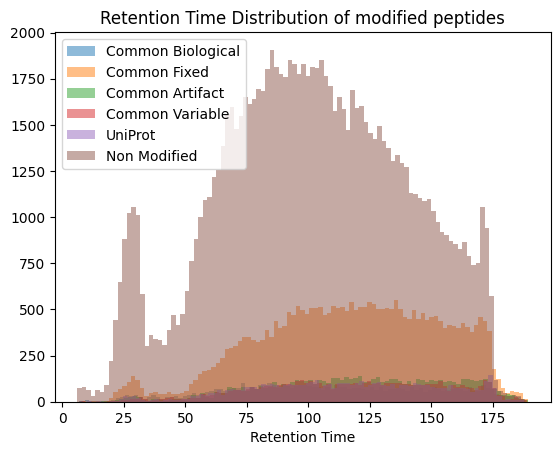

In [127]:
#histogram of all mods dataframes
mods = [common_biological_mods, common_fixed_mods, common_artifact_mods, common_variable_mods, uniprot_mods, non_modified]
mods_names = ["Common Biological", "Common Fixed", "Common Artifact", "Common Variable", "UniProt", "Non Modified"]
fig, ax = plt.subplots()
for i in range(len(mods)):
    ax.hist(mods[i]["Scan Retention Time"], bins=100, alpha=0.5, label=mods_names[i])
ax.legend()
plt.xlabel("Retention Time")
#add title
plt.title("Retention Time Distribution of modified peptides")
plt.show()

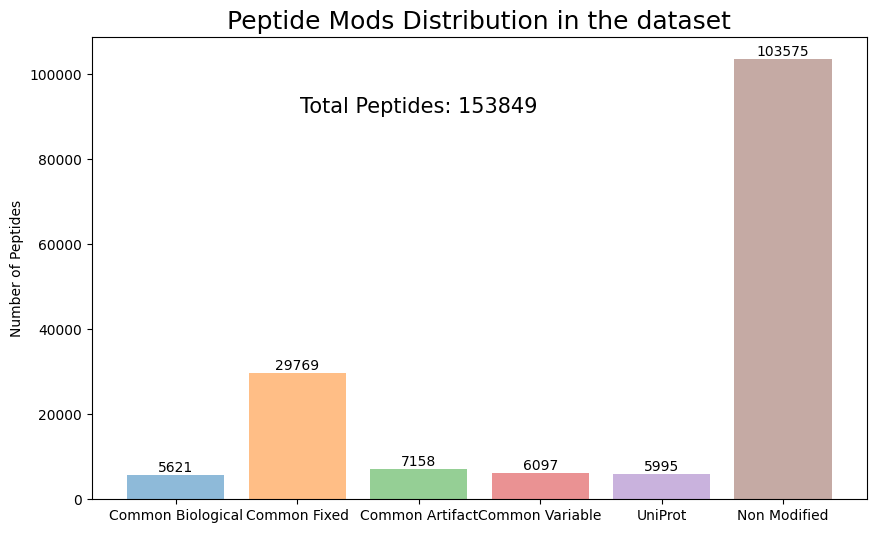

In [125]:
#Histogram of the distribution of peptide Mods in the dataset
mods = [common_biological_mods, common_fixed_mods, common_artifact_mods, common_variable_mods, uniprot_mods, non_modified]
mods_names = ["Common Biological", "Common Fixed", "Common Artifact", "Common Variable", "UniProt", "Non Modified"]

for i in range(len(mods)):
    plt.bar(i, len(mods[i]["Scan Retention Time"].to_list()), alpha=0.5)

plt.xticks(range(len(mods)), mods_names)
#increase plot size
fig = plt.gcf()
fig.set_size_inches(10, 6)
#add title
plt.title("Peptide Mods Distribution in the dataset", fontsize=18)
#add y label
plt.ylabel("Number of Peptides")
#add text with the number of peptides in each category
for i in range(len(mods)):
    plt.text(i, len(mods[i]["Scan Retention Time"].to_list()), len(mods[i]["Scan Retention Time"].to_list()), ha='center', va='bottom')
#text of total peptides. Located at the top of the plot with letter size 20
plt.text(2, 90000, "Total Peptides: " + str(len(mp_dataframe)), ha='center', va='bottom', fontsize=15)    
plt.show()